<a href="https://colab.research.google.com/github/hemanya2003/Angul-Kaniha/blob/main/Dem_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ranibedha_Dem.tif to Ranibedha_Dem.tif


In [ ]:
pip install geopandas matplotlib


In [ ]:
!pip install geopandas rasterio matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 49.1 MB/s eta 0:00:00


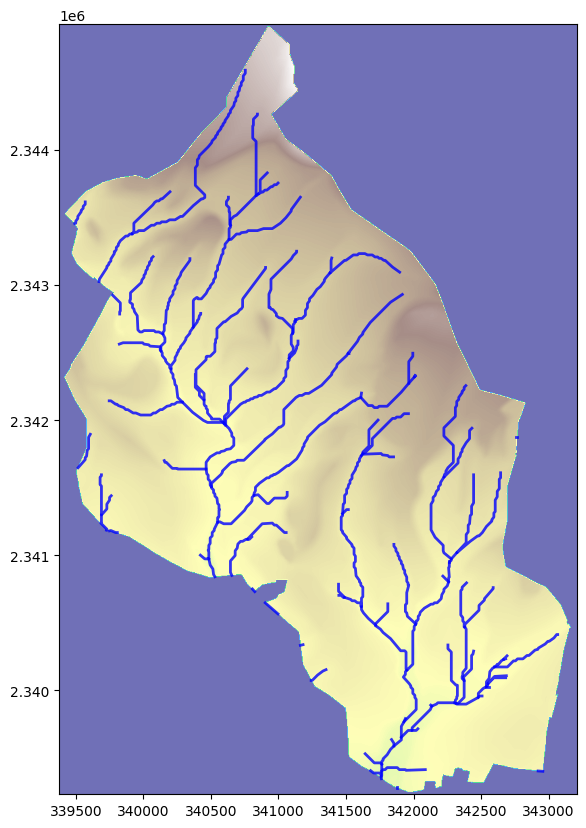

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import rasterio
from shapely.geometry import LineString, MultiLineString

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
dem_src = rasterio.open(dem_path)
dem_data = dem_src.read(1)  # Read the first band of the DEM
dem_bounds = dem_src.bounds  # Get the geographical bounds
dem_extent = [dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top]  # Extent for plotting

# Load the shapefile with drainage lines and stream order (GRID_CODE)
shapefile_path = '/content/Drain_Disolve.shp'
drainage_lines = gpd.read_file(shapefile_path)

# Ensure 'GRID_CODE' is integer and sort drainage lines by stream order
drainage_lines['GRID_CODE'] = drainage_lines['GRID_CODE'].astype(int)
drainage_lines_sorted = drainage_lines.sort_values(by='GRID_CODE')

# Set up the plot with DEM as the background
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Flow Animation from Upstream to Downstream')

def plot_dem_background():
    ax.imshow(dem_data, cmap='terrain', extent=dem_extent, origin='upper', alpha=0.7)  # Semi-transparent DEM
    ax.set_xlim(dem_extent[0], dem_extent[1])
    ax.set_ylim(dem_extent[2], dem_extent[3])

def reverse_coords(coords):
    return coords[::-1]

def animate(frame):
    ax.clear()
    plot_dem_background()

    total_lines = len(drainage_lines_sorted)
    lines_to_show = int((frame + 1) / 100 * total_lines)

    for idx, line in drainage_lines_sorted.head(lines_to_show).iterrows():
        geom = line.geometry

        if isinstance(geom, LineString):
            coords = list(geom.coords)
            if coords:
                coords = reverse_coords(coords)  # Reverse coords for downstream flow
                end_idx = int((frame + 1) / 100 * len(coords))
                if end_idx > 1:
                    partial_coords = coords[:end_idx]
                    if len(partial_coords) > 1:
                        x, y = zip(*partial_coords)
                        ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

        elif isinstance(geom, MultiLineString):
            for single_line in geom.geoms:
                coords = list(single_line.coords)
                if coords:
                    coords = reverse_coords(coords)  # Reverse coords for downstream flow
                    end_idx = int((frame + 1) / 100 * len(coords))
                    if end_idx > 1:
                        partial_coords = coords[:end_idx]
                        if len(partial_coords) > 1:
                            x, y = zip(*partial_coords)
                            ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

    return []

# Adjust the speed of the animation
animation_speed = 200  # Increase milliseconds between frames for slower animation
frames_per_second = 15  # Decrease frames per second for slower playback

anim = FuncAnimation(fig, animate, frames=100, interval=animation_speed, repeat=False)

# Save or display the animation
anim.save('gradual_drainage_flow_animation.mp4', writer='ffmpeg', fps=frames_per_second)  # Adjust fps for desired playback speed
plt.show()

# Close the raster file after we're done
dem_src.close()


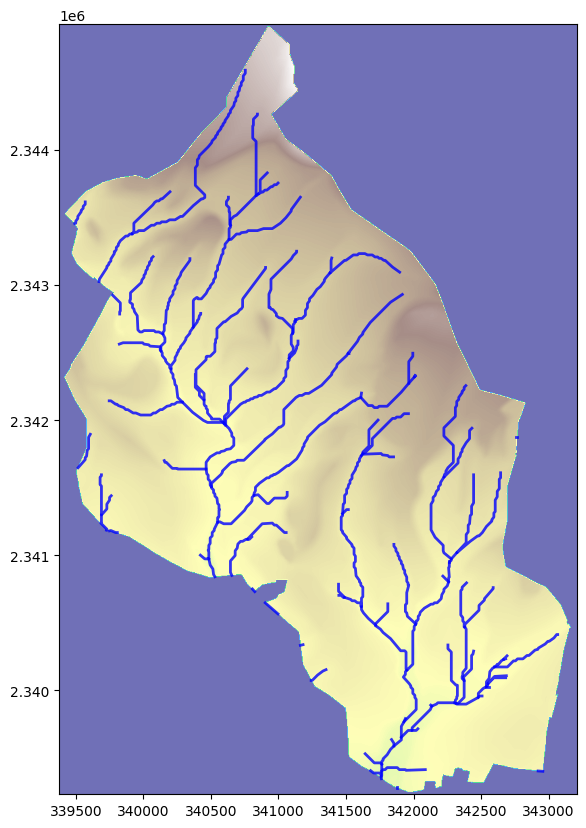

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import rasterio
from shapely.geometry import LineString, MultiLineString

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
dem_src = rasterio.open(dem_path)
dem_data = dem_src.read(1)  # Read the first band of the DEM
dem_bounds = dem_src.bounds  # Get the geographical bounds
dem_extent = [dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top]  # Extent for plotting

# Load the shapefile with drainage lines and stream order (GRID_CODE)
shapefile_path = '/content/Drain_Disolve.shp'
drainage_lines = gpd.read_file(shapefile_path)

# Ensure 'GRID_CODE' is integer and sort drainage lines by stream order
drainage_lines['GRID_CODE'] = drainage_lines['GRID_CODE'].astype(int)
drainage_lines_sorted = drainage_lines.sort_values(by='GRID_CODE')

# Set up the plot with DEM as the background
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Flow Animation from Upstream to Downstream')

def plot_dem_background():
    ax.imshow(dem_data, cmap='terrain', extent=dem_extent, origin='upper', alpha=0.7)  # Semi-transparent DEM
    ax.set_xlim(dem_extent[0], dem_extent[1])
    ax.set_ylim(dem_extent[2], dem_extent[3])

def reverse_coords(coords):
    return coords[::-1]

def animate(frame):
    ax.clear()
    plot_dem_background()

    total_lines = len(drainage_lines_sorted)
    lines_to_show = int((frame + 1) / 100 * total_lines)

    for idx, line in drainage_lines_sorted.head(lines_to_show).iterrows():
        geom = line.geometry

        if isinstance(geom, LineString):
            coords = list(geom.coords)
            if coords:
                # Determine if we need to reverse the coordinates
                # Check if the first coordinate is to the left or right to ensure proper downstream flow
                if coords[0][0] > coords[-1][0]:
                    coords = reverse_coords(coords)  # Reverse coords for downstream flow
                end_idx = int((frame + 1) / 100 * len(coords))
                if end_idx > 1:
                    partial_coords = coords[:end_idx]
                    if len(partial_coords) > 1:
                        x, y = zip(*partial_coords)
                        ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

        elif isinstance(geom, MultiLineString):
            for single_line in geom.geoms:
                coords = list(single_line.coords)
                if coords:
                    # Determine if we need to reverse the coordinates
                    if coords[0][0] > coords[-1][0]:
                        coords = reverse_coords(coords)  # Reverse coords for downstream flow
                    end_idx = int((frame + 1) / 100 * len(coords))
                    if end_idx > 1:
                        partial_coords = coords[:end_idx]
                        if len(partial_coords) > 1:
                            x, y = zip(*partial_coords)
                            ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

    return []

# Adjust the speed of the animation
animation_speed = 200  # Increase milliseconds between frames for slower animation
frames_per_second = 15  # Decrease frames per second for slower playback

anim = FuncAnimation(fig, animate, frames=100, interval=animation_speed, repeat=False)

# Save or display the animation
anim.save('gradual_drainage_flow_animation1.mp4', writer='ffmpeg', fps=frames_per_second)  # Adjust fps for desired playback speed
plt.show()

# Close the raster file after we're done
dem_src.close()


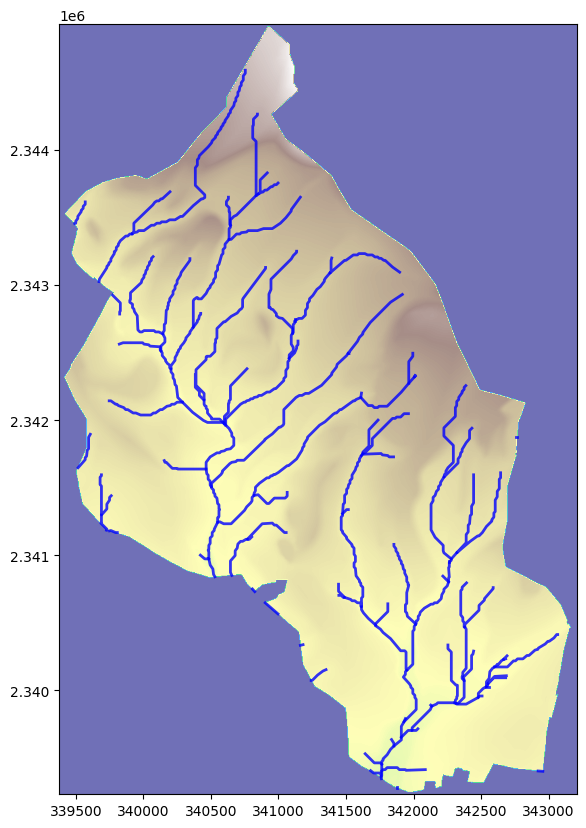

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import rasterio
from shapely.geometry import LineString, MultiLineString

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
dem_src = rasterio.open(dem_path)
dem_data = dem_src.read(1)  # Read the first band of the DEM
dem_bounds = dem_src.bounds  # Get the geographical bounds
dem_extent = [dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top]  # Extent for plotting

# Load the shapefile with drainage lines and stream order (GRID_CODE)
shapefile_path = '/content/Drain_Disolve.shp'
drainage_lines = gpd.read_file(shapefile_path)

# Ensure 'GRID_CODE' is integer and sort drainage lines by stream order
drainage_lines['GRID_CODE'] = drainage_lines['GRID_CODE'].astype(int)
drainage_lines_sorted = drainage_lines.sort_values(by='GRID_CODE')

# Set up the plot with DEM as the background
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Flow Animation from Upstream to Downstream')

def plot_dem_background():
    ax.imshow(dem_data, cmap='terrain', extent=dem_extent, origin='upper', alpha=0.7)  # Semi-transparent DEM
    ax.set_xlim(dem_extent[0], dem_extent[1])
    ax.set_ylim(dem_extent[2], dem_extent[3])

def reverse_coords(coords):
    return coords[::-1]

def animate(frame):
    ax.clear()
    plot_dem_background()

    total_lines = len(drainage_lines_sorted)
    lines_to_show = int((frame + 1) / 100 * total_lines)

    for idx, line in drainage_lines_sorted.head(lines_to_show).iterrows():
        geom = line.geometry

        if isinstance(geom, LineString):
            coords = list(geom.coords)
            if coords:
                # Reverse coordinates if needed based on their relative position
                # Assuming GRID_CODE correctly represents the flow direction
                if not is_downstream(coords):
                    coords = reverse_coords(coords)
                end_idx = int((frame + 1) / 100 * len(coords))
                if end_idx > 1:
                    partial_coords = coords[:end_idx]
                    if len(partial_coords) > 1:
                        x, y = zip(*partial_coords)
                        ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

        elif isinstance(geom, MultiLineString):
            for single_line in geom.geoms:
                coords = list(single_line.coords)
                if coords:
                    # Reverse coordinates if needed based on their relative position
                    if not is_downstream(coords):
                        coords = reverse_coords(coords)
                    end_idx = int((frame + 1) / 100 * len(coords))
                    if end_idx > 1:
                        partial_coords = coords[:end_idx]
                        if len(partial_coords) > 1:
                            x, y = zip(*partial_coords)
                            ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

    return []

def is_downstream(coords):
    """ Determine if the coordinates are in downstream order.
        This function needs to be implemented based on your data's stream order information.
    """
    # Placeholder function - you may need to implement your logic based on stream order or attributes
    return True

# Adjust the speed of the animation
animation_speed = 200  # Increase milliseconds between frames for slower animation
frames_per_second = 15  # Decrease frames per second for slower playback

anim = FuncAnimation(fig, animate, frames=100, interval=animation_speed, repeat=False)

# Save or display the animation
anim.save('gradual_drainage_flow_animation1.mp4', writer='ffmpeg', fps=frames_per_second)  # Adjust fps for desired playback speed
plt.show()

# Close the raster file after we're done
dem_src.close()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ranibeda_Drain.dbf to Ranibeda_Drain.dbf
Saving Ranibeda_Drain.prj to Ranibeda_Drain.prj
Saving Ranibeda_Drain.shp to Ranibeda_Drain.shp
Saving Ranibeda_Drain.shx to Ranibeda_Drain.shx


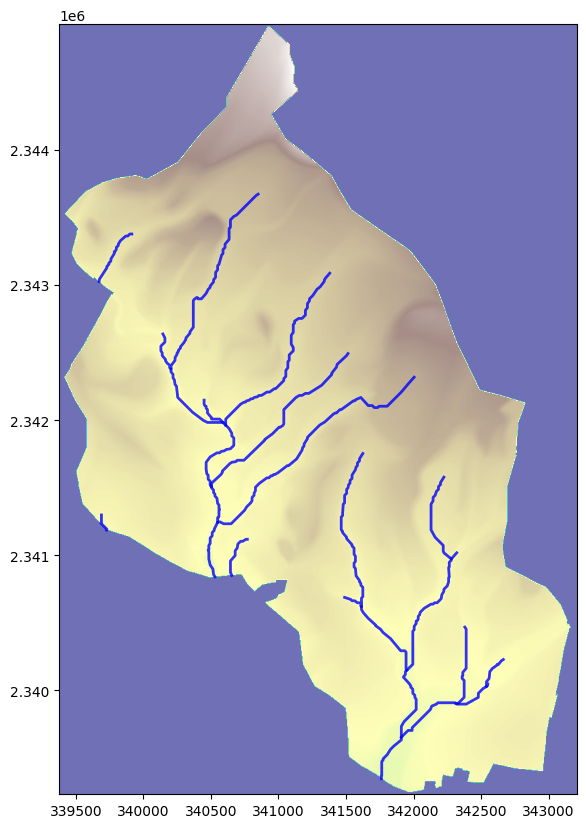

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import rasterio
from shapely.geometry import LineString, MultiLineString

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
dem_src = rasterio.open(dem_path)
dem_data = dem_src.read(1)  # Read the first band of the DEM
dem_bounds = dem_src.bounds  # Get the geographical bounds
dem_extent = [dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top]  # Extent for plotting

# Load the shapefile with drainage lines and stream order (GRID_CODE)
shapefile_path = '/content/Ranibeda_Drain.shp'
drainage_lines = gpd.read_file(shapefile_path)

# Ensure 'GRID_CODE' is integer and sort drainage lines by stream order
drainage_lines['GRID_CODE'] = drainage_lines['GRID_CODE'].astype(int)
drainage_lines_sorted = drainage_lines.sort_values(by='GRID_CODE')

# Set up the plot with DEM as the background
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Flow Animation from Upstream to Downstream')

def plot_dem_background():
    ax.imshow(dem_data, cmap='terrain', extent=dem_extent, origin='upper', alpha=0.7)  # Semi-transparent DEM
    ax.set_xlim(dem_extent[0], dem_extent[1])
    ax.set_ylim(dem_extent[2], dem_extent[3])

def animate(frame):
    ax.clear()
    plot_dem_background()

    total_lines = len(drainage_lines_sorted)
    lines_to_show = int((frame + 1) / 100 * total_lines)

    for idx, line in drainage_lines_sorted.head(lines_to_show).iterrows():
        geom = line.geometry

        if isinstance(geom, LineString):
            coords = list(geom.coords)
            if coords:
                # Determine if reversing is necessary
                if not is_correct_order(coords):
                    coords = reverse_coords(coords)
                end_idx = int((frame + 1) / 100 * len(coords))
                if end_idx > 1:
                    partial_coords = coords[:end_idx]
                    if len(partial_coords) > 1:
                        x, y = zip(*partial_coords)
                        ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

        elif isinstance(geom, MultiLineString):
            for single_line in geom.geoms:
                coords = list(single_line.coords)
                if coords:
                    # Determine if reversing is necessary
                    if not is_correct_order(coords):
                        coords = reverse_coords(coords)
                    end_idx = int((frame + 1) / 100 * len(coords))
                    if end_idx > 1:
                        partial_coords = coords[:end_idx]
                        if len(partial_coords) > 1:
                            x, y = zip(*partial_coords)
                            ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

    return []

def is_correct_order(coords):
    """ Placeholder function to determine if coordinates are in the correct downstream order.
        This should be implemented based on stream order or other attributes.
    """
    # Implement your logic based on your dataset
    return True

def reverse_coords(coords):
    """ Reverse the coordinates to ensure correct downstream orientation. """
    return coords[::-1]

# Adjust the speed of the animation
animation_speed = 400  # Increase milliseconds between frames for slower animation
frames_per_second = 5  # Decrease frames per second for slower playback

anim = FuncAnimation(fig, animate, frames=100, interval=animation_speed, repeat=False)

# Save or display the animation
anim.save('gradual_drainage_flow_animation.mp4', writer='ffmpeg', fps=frames_per_second)  # Adjust fps for desired playback speed
plt.show()

# Close the raster file after we're done
dem_src.close()


DEM Data Shape: (1140, 766)
Shaded relief generated successfully.


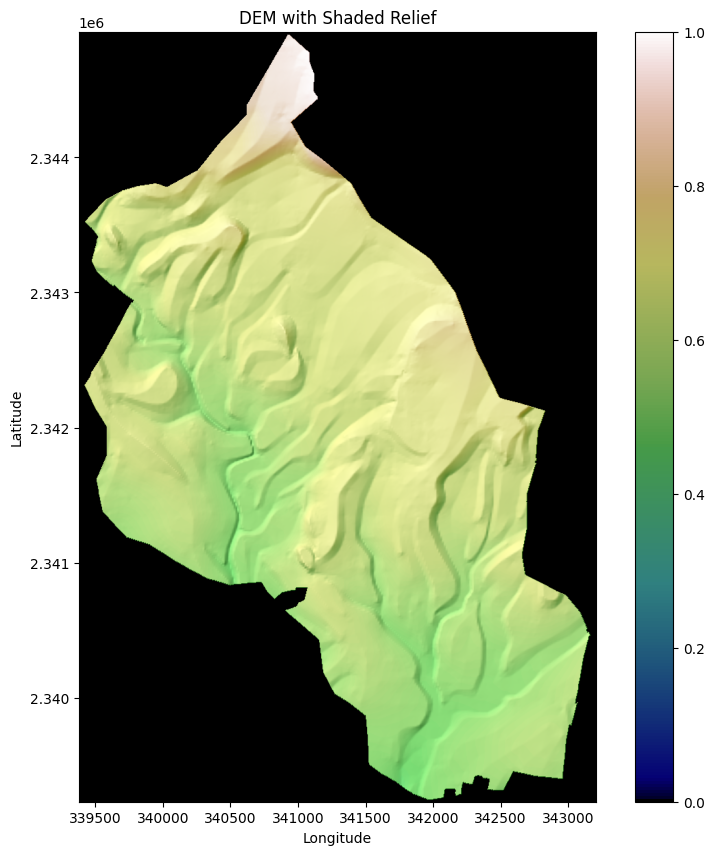

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
with rasterio.open(dem_path) as dem_src:
    dem_data = dem_src.read(1)  # Read the first band of the DEM
    dem_bounds = dem_src.bounds  # Get the geographical bounds

# Check if dem_data is a 2D array
if dem_data.ndim != 2:
    raise ValueError("DEM data should be a 2D array")

print(f"DEM Data Shape: {dem_data.shape}")

# Compute gradients
def compute_gradients(dem_array):
    dem_array = dem_array.astype(float)  # Ensure data is float for gradients
    dx, dy = np.gradient(dem_array)
    return dx, dy

# Compute gradients
dx, dy = compute_gradients(dem_data)

# Create a shaded relief effect
def shaded_relief(dem_array, dx, dy):
    # Create a LightSource object
    ls = LightSource(azdeg=315, altdeg=45)

    # Compute the shaded relief with default parameters
    shaded = ls.shade(dem_array, cmap=plt.get_cmap('gist_earth'), vert_exag=1)

    return shaded

# Generate shaded relief image
try:
    shaded = shaded_relief(dem_data, dx, dy)
    print("Shaded relief generated successfully.")
except Exception as e:
    print(f"Error generating shaded relief: {e}")

# Plot the shaded relief if successful
if 'shaded' in locals():
    fig, ax = plt.subplots(figsize=(10, 10))
    img = ax.imshow(shaded, cmap='gist_earth', extent=[dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top])
    ax.set_title('DEM with Shaded Relief')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.colorbar(img, ax=ax, orientation='vertical')
    plt.show()
else:
    print("Shaded relief was not generated. Check for errors.")


DEM Data Shape: (1140, 766)


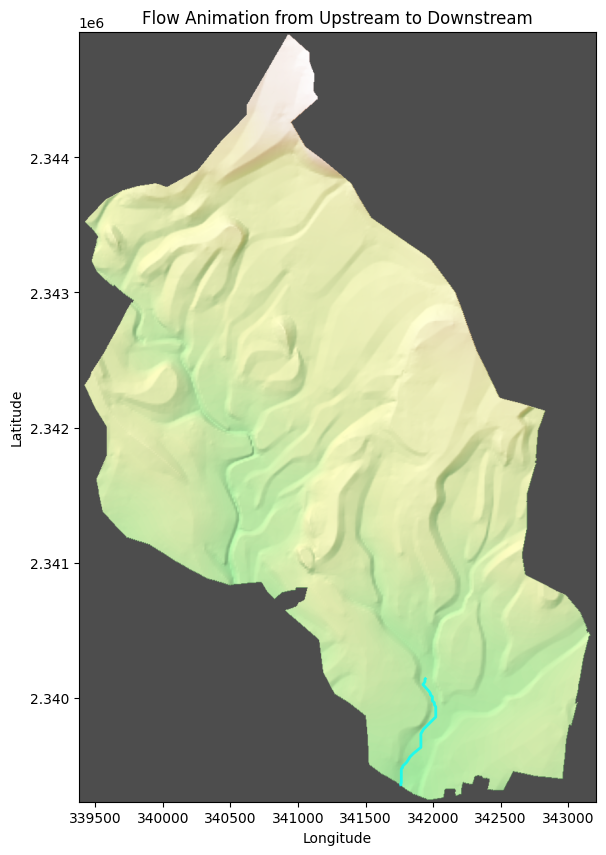

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib.animation import FuncAnimation
import geopandas as gpd
from shapely.geometry import LineString

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
with rasterio.open(dem_path) as dem_src:
    dem_data = dem_src.read(1)  # Read the first band of the DEM
    dem_bounds = dem_src.bounds  # Get the geographical bounds

# Check if dem_data is a 2D array
if dem_data.ndim != 2:
    raise ValueError("DEM data should be a 2D array")

print(f"DEM Data Shape: {dem_data.shape}")

# Compute gradients
def compute_gradients(dem_array):
    dem_array = dem_array.astype(float)  # Ensure data is float for gradients
    dx, dy = np.gradient(dem_array)
    return dx, dy

# Compute gradients
dx, dy = compute_gradients(dem_data)

# Create a shaded relief effect
def shaded_relief(dem_array, dx, dy):
    # Create a LightSource object
    ls = LightSource(azdeg=315, altdeg=45)

    # Compute the shaded relief with default parameters
    shaded = ls.shade(dem_array, cmap=plt.get_cmap('gist_earth'), vert_exag=1)

    return shaded

# Generate shaded relief image
shaded = shaded_relief(dem_data, dx, dy)

# Load the shapefile with drainage lines and stream order (GRID_CODE)
shapefile_path = '/content/Drain_Disolve.shp'
drainage_lines = gpd.read_file(shapefile_path)

# Sort drainage lines by stream order (GRID_CODE)
drainage_lines['GRID_CODE'] = drainage_lines['GRID_CODE'].astype(int)
drainage_lines_sorted = drainage_lines.sort_values(by='GRID_CODE')

# Set up the plot with DEM as the background
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(shaded, cmap='gist_earth', extent=[dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top])

# Plot the shaded relief
def plot_dem_background():
    ax.imshow(shaded, cmap='inferno', extent=[dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top], alpha=0.7)  # Semi-transparent DEM

# Function to animate the gradual drawing of drainage lines
def animate(frame):
    ax.clear()
    plot_dem_background()

    # Plot lines up to the current frame
    total_frames = len(drainage_lines_sorted)
    current_length = (frame + 1) / total_frames  # Proportion of the line to show
    for idx, line in drainage_lines_sorted.iterrows():
        geom = line.geometry
        if isinstance(geom, LineString):
            n_coords = len(geom.coords)
            end_idx = int(current_length * n_coords)
            partial_line = LineString(geom.coords[:end_idx])
            gpd.GeoSeries([partial_line]).plot(ax=ax, color='cyan', linewidth=2, alpha=0.8)

    ax.set_title('Flow Animation from Upstream to Downstream')
    ax.set_xlim(dem_bounds.left, dem_bounds.right)
    ax.set_ylim(dem_bounds.bottom, dem_bounds.top)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Create the animation showing the drainage flow
anim = FuncAnimation(fig, animate, frames=len(drainage_lines_sorted), interval=50, repeat=False)

# Save or display the animation
anim.save('gradual_drainage_flow_animation2.mp4', writer='ffmpeg', fps=10)
plt.show()


In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib.animation import FuncAnimation
import geopandas as gpd
from shapely.geometry import LineString

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
with rasterio.open(dem_path) as dem_src:
    dem_data = dem_src.read(1)  # Read the first band of the DEM
    dem_bounds = dem_src.bounds  # Get the geographical bounds

# Check if dem_data is a 2D array
if dem_data.ndim != 2:
    raise ValueError("DEM data should be a 2D array")

print(f"DEM Data Shape: {dem_data.shape}")

# Compute gradients
def compute_gradients(dem_array):
    dem_array = dem_array.astype(float)  # Ensure data is float for gradients
    dx, dy = np.gradient(dem_array)
    return dx, dy

# Compute gradients
dx, dy = compute_gradients(dem_data)

# Create a shaded relief effect
def shaded_relief(dem_array, dx, dy):
    # Create a LightSource object
    ls = LightSource(azdeg=315, altdeg=45)

    # Compute the shaded relief with default parameters
    shaded = ls.shade(dem_array, cmap=plt.get_cmap('inferno'), vert_exag=1)

    return shaded

# Generate shaded relief image
shaded = shaded_relief(dem_data, dx, dy)

# Load the shapefile with drainage lines and stream order (GRID_CODE)
shapefile_path = '/content/Drain_Disolve.shp'
drainage_lines = gpd.read_file(shapefile_path)

# Sort drainage lines by stream order (GRID_CODE)
drainage_lines['GRID_CODE'] = drainage_lines['GRID_CODE'].astype(int)
drainage_lines_sorted = drainage_lines.sort_values(by='GRID_CODE')

# Set up the plot with DEM as the background
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot the shaded relief background
def plot_dem_background():
    ax.imshow(shaded, cmap='inferno', extent=[dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top], alpha=0.7)  # Semi-transparent DEM

# Function to animate the gradual drawing of drainage lines
def animate(frame):
    ax.clear()
    plot_dem_background()

  total_lines = len(drainage_lines_sorted)
    lines_to_show = int((frame + 1) / 100 * total_lines)

    for idx, line in drainage_lines_sorted.head(lines_to_show).iterrows():
        geom = line.geometry

        if isinstance(geom, LineString):
            coords = list(geom.coords)
            if coords:
                # Determine if reversing is necessary
                if not is_correct_order(coords):
                    coords = reverse_coords(coords)
                end_idx = int((frame + 1) / 100 * len(coords))
                if end_idx > 1:
                    partial_coords = coords[:end_idx]
                    if len(partial_coords) > 1:
                        x, y = zip(*partial_coords)
                        ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

        elif isinstance(geom, MultiLineString):
            for single_line in geom.geoms:
                coords = list(single_line.coords)
                if coords:
                    # Determine if reversing is necessary
                    if not is_correct_order(coords):
                        coords = reverse_coords(coords)
                    end_idx = int((frame + 1) / 100 * len(coords))
                    if end_idx > 1:
                        partial_coords = coords[:end_idx]
                        if len(partial_coords) > 1:
                            x, y = zip(*partial_coords)
                            ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

    return []

def is_correct_order(coords):
    """ Placeholder function to determine if coordinates are in the correct downstream order.
        This should be implemented based on stream order or other attributes.
    """
    # Implement your logic based on your dataset
    return True

def reverse_coords(coords):
    """ Reverse the coordinates to ensure correct downstream orientation. """
    return coords[::-1]

# Adjust the speed of the animation
animation_speed = 400  # Increase milliseconds between frames for slower animation
frames_per_second = 5  # Decrease frames per second for slower playback

anim = FuncAnimation(fig, animate, frames=100, interval=animation_speed, repeat=False)

# Save or display the animation
anim.save('gradual_drainage_flow_animation.mp4', writer='ffmpeg', fps=frames_per_second)  # Adjust fps for desired playback speed
plt.show()

# Close the raster file after we're done
dem_src.close()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 63)

DEM Data Shape: (1140, 766)


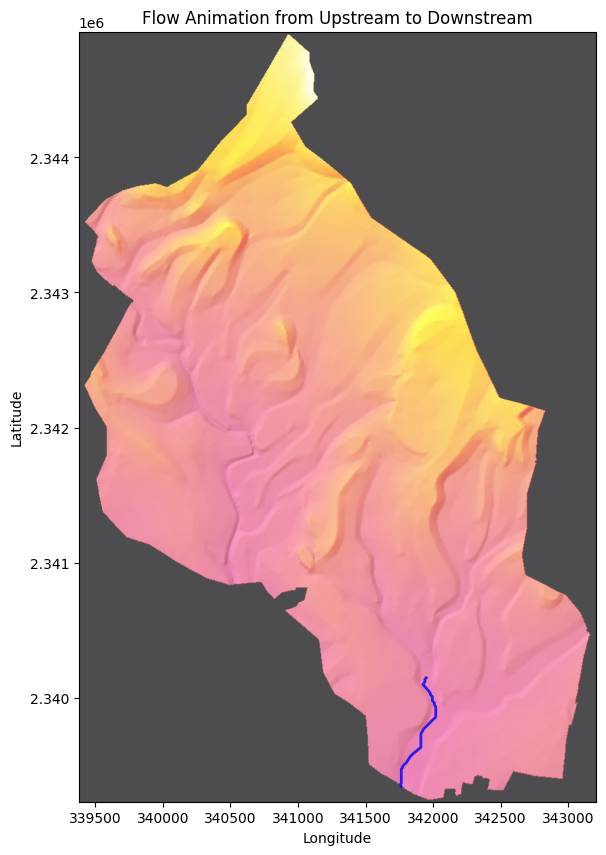

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib.animation import FuncAnimation
import geopandas as gpd
from shapely.geometry import LineString

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
with rasterio.open(dem_path) as dem_src:
    dem_data = dem_src.read(1)  # Read the first band of the DEM
    dem_bounds = dem_src.bounds  # Get the geographical bounds

# Check if dem_data is a 2D array
if dem_data.ndim != 2:
    raise ValueError("DEM data should be a 2D array")

print(f"DEM Data Shape: {dem_data.shape}")

# Compute gradients
def compute_gradients(dem_array):
    dem_array = dem_array.astype(float)  # Ensure data is float for gradients
    dx, dy = np.gradient(dem_array)
    return dx, dy

# Compute gradients
dx, dy = compute_gradients(dem_data)

# Create a shaded relief effect
def shaded_relief(dem_array, dx, dy):
    # Create a LightSource object
    ls = LightSource(azdeg=315, altdeg=45)

    # Compute the shaded relief with default parameters
    shaded = ls.shade(dem_array, cmap=plt.get_cmap('inferno'), vert_exag=1)

    return shaded

# Generate shaded relief image
shaded = shaded_relief(dem_data, dx, dy)

# Load the shapefile with drainage lines and stream order (GRID_CODE)
shapefile_path = '/content/Drain_Disolve.shp'
drainage_lines = gpd.read_file(shapefile_path)

# Sort drainage lines by stream order (GRID_CODE)
drainage_lines['GRID_CODE'] = drainage_lines['GRID_CODE'].astype(int)
drainage_lines_sorted = drainage_lines.sort_values(by='GRID_CODE')

# Set up the plot with DEM as the background
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot the shaded relief background
def plot_dem_background():
    ax.imshow(shaded, cmap='inferno', extent=[dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top], alpha=0.7)  # Semi-transparent DEM

# Function to animate the gradual drawing of drainage lines
def animate(frame):
    ax.clear()
    plot_dem_background()

    total_lines = len(drainage_lines_sorted)
    lines_to_show = int((frame + 1) / 100 * total_lines)

    for idx, line in drainage_lines_sorted.head(lines_to_show).iterrows():
        geom = line.geometry

        if isinstance(geom, LineString):
            coords = list(geom.coords)
            if coords:
                # Determine if reversing is necessary
                if not is_correct_order(coords):
                    coords = reverse_coords(coords)
                end_idx = int((frame + 1) / 100 * len(coords))
                if end_idx > 1:
                    partial_coords = coords[:end_idx]
                    if len(partial_coords) > 1:
                        x, y = zip(*partial_coords)
                        ax.plot(x, y, color='blue', linewidth=2, alpha=0.8)

    ax.set_title('Flow Animation from Upstream to Downstream')
    ax.set_xlim(dem_bounds.left, dem_bounds.right)
    ax.set_ylim(dem_bounds.bottom, dem_bounds.top)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

def is_correct_order(coords):
    """ Placeholder function to determine if coordinates are in the correct downstream order.
        This should be implemented based on stream order or other attributes.
    """
    # Implement your logic based on your dataset
    return True

def reverse_coords(coords):
    """ Reverse the coordinates to ensure correct downstream orientation. """
    return coords[::-1]

# Adjust the speed of the animation
animation_speed = 400  # Increase milliseconds between frames for slower animation
frames_per_second = 5  # Decrease frames per second for slower playback

anim = FuncAnimation(fig, animate, frames=100, interval=animation_speed, repeat=False)

# Save or display the animation
try:
    anim.save('gradual_drainage_flow_animation.mp4', writer='ffmpeg', fps=frames_per_second)  # Adjust fps for desired playback speed
    plt.show()
except Exception as e:
    print(f"Error saving animation: {e}")

# Close the raster file after we're done
dem_src.close()


DEM Data Shape: (1140, 766)
Error saving animation: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1000x1000', '-pix_fmt', 'rgba', '-r', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'gradual_drainage_flow_animation.mp4']' returned non-zero exit status 255.


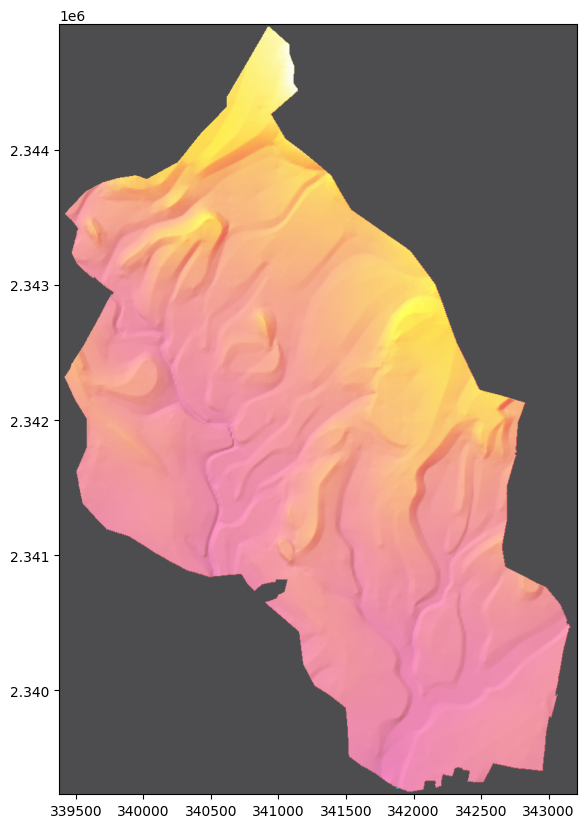

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib.animation import FuncAnimation
import geopandas as gpd
from shapely.geometry import LineString, MultiLineString
from shapely.errors import ShapelyError

# Load DEM (raster) data
dem_path = '/content/Ranibedha_Dem.tif'
with rasterio.open(dem_path) as dem_src:
    dem_data = dem_src.read(1)  # Read the first band of the DEM
    dem_bounds = dem_src.bounds  # Get the geographical bounds

# Check if dem_data is a 2D array
if dem_data.ndim != 2:
    raise ValueError("DEM data should be a 2D array")

print(f"DEM Data Shape: {dem_data.shape}")

# Compute gradients
def compute_gradients(dem_array):
    dem_array = dem_array.astype(float)  # Ensure data is float for gradients
    dx, dy = np.gradient(dem_array)
    return dx, dy

# Compute gradients
dx, dy = compute_gradients(dem_data)

# Create a shaded relief effect
def shaded_relief(dem_array, dx, dy):
    # Create a LightSource object
    ls = LightSource(azdeg=315, altdeg=45)

    # Compute the shaded relief with default parameters
    shaded = ls.shade(dem_array, cmap=plt.get_cmap('inferno'), vert_exag=1)

    return shaded

# Generate shaded relief image
shaded = shaded_relief(dem_data, dx, dy)

# Load the shapefile with drainage lines and stream order (GRID_CODE)
shapefile_path = '/content/Drain_Disolve.shp'
drainage_lines = gpd.read_file(shapefile_path)

# Sort drainage lines by stream order (GRID_CODE)
drainage_lines['GRID_CODE'] = drainage_lines['GRID_CODE'].astype(int)
drainage_lines_sorted = drainage_lines.sort_values(by='GRID_CODE')

# Set up the plot with DEM as the background
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot the shaded relief background
def plot_dem_background():
    ax.imshow(shaded, cmap='inferno', extent=[dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top], alpha=0.7)  # Semi-transparent DEM

# Function to animate the gradual drawing of drainage lines
def animate(frame):
    ax.clear()
    plot_dem_background()

    # Calculate the current length of lines to display
    total_frames = len(drainage_lines_sorted)
    current_length = (frame + 1) / total_frames  # Proportion of the line to show

    for idx, row in drainage_lines_sorted.iterrows():
        geom = row.geometry
        if isinstance(geom, LineString):
            coords = list(geom.coords)
            if coords and len(coords) > 1:  # Ensure there are coordinates to plot
                end_idx = int(current_length * len(coords))
                if end_idx > 1:  # Ensure end_idx is positive and greater than 1
                    partial_line = LineString(coords[:end_idx])
                    if len(partial_line.coords) > 1:  # Ensure there are more than one coordinate
                        try:
                            gpd.GeoSeries([partial_line]).plot(ax=ax, color='cyan', linewidth=2, alpha=0.8)
                        except ShapelyError as e:
                            print(f"Error plotting LineString: {e}")
        elif isinstance(geom, MultiLineString):
            for line in geom.geoms:
                coords = list(line.coords)
                if coords and len(coords) > 1:  # Ensure there are coordinates to plot
                    end_idx = int(current_length * len(coords))
                    if end_idx > 1:  # Ensure end_idx is positive and greater than 1
                        partial_line = LineString(coords[:end_idx])
                        if len(partial_line.coords) > 1:  # Ensure there are more than one coordinate
                            try:
                                gpd.GeoSeries([partial_line]).plot(ax=ax, color='cyan', linewidth=2, alpha=0.8)
                            except ShapelyError as e:
                                print(f"Error plotting MultiLineString segment: {e}")

    ax.set_title('Flow Animation from Upstream to Downstream')
    ax.set_xlim(dem_bounds.left, dem_bounds.right)
    ax.set_ylim(dem_bounds.bottom, dem_bounds.top)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Create the animation showing the drainage flow
anim = FuncAnimation(fig, animate, frames=100, interval=100, repeat=False)

# Save or display the animation
try:
    anim.save('gradual_drainage_flow_animation.mp4', writer='ffmpeg', fps=10)
    plt.show()
except Exception as e:
    print(f"Error saving animation: {e}")
